In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

# train_images, train_labels eğitim veriseti
# test_images, test_labels test veriseti
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Veri kümesi içerisindeki her bir görüntü tek bir etiket ile eşleştirilmiştir. 
#Sınıf isimleri veri kümesi içerisinde yer almadığı için, daha sonra görüntüleri ekrana yazdırmak için bunları aşağıdaki gibi bir dizi içerisinde saklayalım:


class_names = ['Tişört/Üst', 'Pantolon', 'Kazak', 'Elbise', 'Mont', 
               'Sandal', 'Gömlek', 'Spor Ayakkabı', 'Çanta', 'Yarım Bot']

In [0]:
# Veriseti 60.000 görüntüden oluşmakta ve her biri 28x28 pikselden oluşmakta
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
# Her bir etiket 0 ile 9 arasında bir tam sayıdır:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
# Test veri kümesinde 10,000 görüntü mevcuttur. Her bir görüntü, benzer şekilde 28 x 28 piksel den oluşmaktadır:
test_images.shape

(10000, 28, 28)

In [0]:
# test veriseti 10.000 etiket bilgisi kapsamakta
len(test_labels)

10000

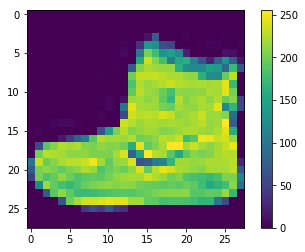

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# görüntülerin piksel değerini 0 ile 1 aralığına ölçekleyeceğiz.
train_images = train_images / 255.0

test_images = test_images / 255.0

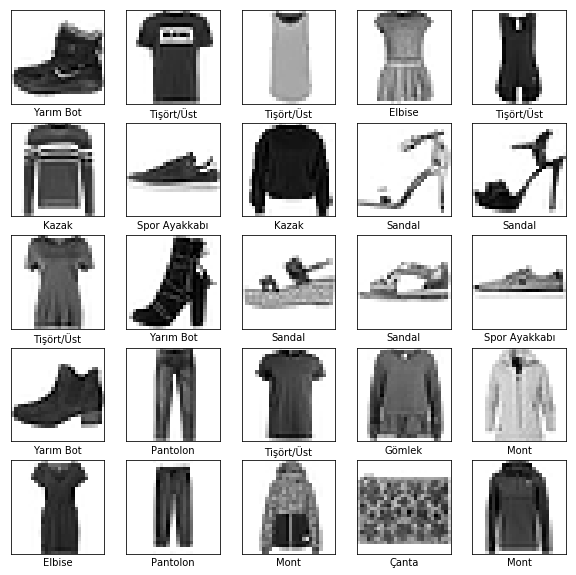

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
# görüntülerin formatını 2 boyutlu sayı dizisinden (28,28 piksel), 28x28=784 piksel değerinden oluşan tek boyutlu sayı dizisine çevirir.

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5001 - acc: 0.8242
Epoch 2/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3774 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3388 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3133 - acc: 0.8859
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2971 - acc: 0.8923


In [0]:
# modelin test veriseti ile nasıl bir performans sergiledğine karşılaştıralım
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3389 - acc: 0.8806
Test accuracy:  0.8806


Test veriseti ile alınan doğruluk değeri, eğitim veriseti ile alınan doğruluk değerinden düşük. Bu farka **aşırı uyum (overfitting)** denir.

**Aşırı uyum** modelin yeni veri ile tahmin yaparken, eğitim verisetine göre daha kötü performans sergilemesidir.

In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([1.2424836e-07, 8.9786258e-09, 3.2936027e-09, 3.7116513e-10,
       5.6150835e-08, 1.0424423e-03, 1.0403416e-08, 1.0789231e-02,
       9.8193880e-07, 9.8816723e-01], dtype=float32)

In [0]:
# bu değerlere bakıldığında hangi etiket sınıfının en yüksek güven değerine sahip olduğunu görelim.
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9